In [1]:
import pandas as pd 
df = pd.read_csv("C:/quant/data/binance_resampled_data/BTCUSDT_factors__threshold0.0005_rolling200.csv")
df.isna().sum()

ts                                          0
price                                       0
sum_buy_size                                0
sum_sell_size                               0
timestamp_duration                          0
                                         ... 
impact_momentum_scaled                      0
impact_sensitivity_scaled                   0
momentum_confirmed_by_orderflow_scaled      0
oi_long_breakout_signal_scaled            783
oi_short_breakout_signal_scaled           316
Length: 121, dtype: int64

In [2]:
df = df.dropna(how="any")
df

,ts,price,sum_buy_size,sum_sell_size,timestamp_duration,price_pct_change,buy_sell_imbalance,change_side,alt_factor_long_term_oi_trend,alt_top_long_short_position_ratio_data_longShortRatio_scaled,...,change_side_sum_5_scaled,px_short_oi_divergence_scaled,oi_trend_slope_scaled,factor_px_oi_divergence_scaled,factor_momentum_volume_scaled,impact_momentum_scaled,impact_sensitivity_scaled,momentum_confirmed_by_orderflow_scaled,oi_long_breakout_signal_scaled,oi_short_breakout_signal_scaled
0,1743930048064000,82965.9,5.255,12.272,22689000.0,-0.000200,-7.017,0.0,70595.031181,0.846217,...,0.270904,0.933522,0.017617,0.042901,0.509312,0.573826,0.773883,0.218688,0.424959,0.592319
1,1743930129586000,82982.5,50.553,43.983,81522000.0,0.000200,6.570,1.0,70595.031181,0.846217,...,0.542575,0.951376,0.018674,0.044864,0.814389,0.841013,0.530046,0.265090,0.925832,0.589711
2,1743930252639000,82999.1,119.582,34.605,123053000.0,0.000200,84.977,1.0,70595.031181,0.846217,...,0.542575,0.947335,0.019740,0.046849,0.971600,0.933222,0.500013,0.702840,0.988274,0.589586
3,1743930259845000,82982.5,12.350,24.080,7206000.0,-0.000200,-11.730,0.0,70595.031181,0.846217,...,0.269779,0.920840,0.020815,0.048341,0.542487,0.626676,0.627775,0.215332,0.548091,0.587480
4,1743930304381000,82965.9,25.966,51.393,44536000.0,-0.000200,-25.427,0.0,70601.935583,0.779814,...,0.269779,0.888102,0.016710,0.039473,0.600994,0.713930,0.518491,0.215332,0.731732,0.585338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525194,1747612245018000,106149.9,0.005,0.376,2000.0,-0.000342,-0.371,0.0,82400.341056,0.890318,...,0.019631,0.032777,0.221687,0.185585,0.412105,0.410861,0.334673,0.224983,0.325431,0.427678
525195,1747612245020000,106175.0,0.018,0.000,2000.0,0.000236,0.018,1.0,82400.341056,0.890318,...,0.163403,0.087347,0.223344,0.180416,0.411723,0.426357,0.214747,0.770787,0.325431,0.444046
525196,1747612245021000,106205.0,0.485,0.000,1000.0,0.000283,0.485,1.0,82400.341056,0.890318,...,0.650635,0.045752,0.223344,0.203214,0.388215,0.408584,0.338596,0.767727,0.325463,0.425263
525197,1747612245021000,106205.0,0.529,0.835,6000.0,0.000518,-0.306,1.0,82400.341056,0.890318,...,0.944463,0.171539,0.358965,0.244039,0.400422,0.403534,0.345005,0.224813,0.325463,0.419923


In [3]:
print(df.columns.tolist())

['ts', 'price', 'sum_buy_size', 'sum_sell_size', 'timestamp_duration', 'price_pct_change', 'buy_sell_imbalance', 'change_side', 'alt_factor_long_term_oi_trend', 'alt_top_long_short_position_ratio_data_longShortRatio_scaled', 'alt_trade_taker_long_short_ratio_data_buySellRatio_scaled', 'alt_factor_short_term_oi_trend_scaled', 'alt_factor_long_term_oi_trend_scaled', 'alt_factor_buy_sell_vol_diff_scaled', 'impact_price_pct_ask_imn', 'impact_price_pct_bid_imn', 'ts_rolling_mean', 'sum_buy_size_rolling_mean', 'sum_sell_size_rolling_mean', 'timestamp_duration_rolling_mean', 'price_pct_change_rolling_mean', 'buy_sell_imbalance_rolling_mean', 'change_side_rolling_mean', 'alt_factor_long_term_oi_trend_rolling_mean', 'impact_price_pct_ask_imn_rolling_mean', 'impact_price_pct_bid_imn_rolling_mean', 'ts_rolling_std', 'sum_buy_size_rolling_std', 'sum_sell_size_rolling_std', 'timestamp_duration_rolling_std', 'price_pct_change_rolling_std', 'buy_sell_imbalance_rolling_std', 'change_side_rolling_std',

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def estimate_steps_to_reach_target_move(price_series, target_pct=0.01):
    """
    计算从每个采样点出发，达到 target_pct 涨跌幅所需的跳数。
    """
    steps_needed = []
    prices = price_series.values

    # 用 tqdm 包装 range，显示进度条
    for i in tqdm(range(len(prices)), desc="计算进度"):
        start_price = prices[i]
        for j in range(i + 1, len(prices)):
            pct_move = abs(prices[j] / start_price - 1)
            if pct_move >= target_pct:
                steps_needed.append(j - i)
                break
        else:
            steps_needed.append(np.nan)  # 没有达到
    return pd.Series(steps_needed, index=price_series.index)


In [5]:
df['steps_to_05pct'] = estimate_steps_to_reach_target_move(df['price'], target_pct=0.005)
n05 = int(df['steps_to_05pct'].median(skipna=True))
print(f"平均达到0.5%需要 {n05} 步")

计算进度: 100%|████████████████████████████████████████████████████████████████████████████████████████| 382954/382954 [00:32<00:00, 11880.02it/s]

平均达到0.5%需要 369 步


In [6]:
df['steps_to_1pct'] = estimate_steps_to_reach_target_move(df['price'], target_pct=0.01)
n1 = int(df['steps_to_1pct'].median(skipna=True))
print(f"平均达到1%需要 {n1} 步")

计算进度: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 382954/382954 [02:03<00:00, 3094.84it/s]

平均达到1%需要 1426 步


In [7]:
df['steps_to_2pct'] = estimate_steps_to_reach_target_move(df['price'], target_pct=0.02)
n2 = int(df['steps_to_2pct'].median(skipna=True))
print(f"平均达到2%需要 {n2} 步")

计算进度: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 382954/382954 [08:23<00:00, 760.88it/s]


平均达到2%需要 5811 步


In [8]:
df = df.dropna(how="any")
df

,ts,price,sum_buy_size,sum_sell_size,timestamp_duration,price_pct_change,buy_sell_imbalance,change_side,alt_factor_long_term_oi_trend,alt_top_long_short_position_ratio_data_longShortRatio_scaled,...,factor_px_oi_divergence_scaled,factor_momentum_volume_scaled,impact_momentum_scaled,impact_sensitivity_scaled,momentum_confirmed_by_orderflow_scaled,oi_long_breakout_signal_scaled,oi_short_breakout_signal_scaled,steps_to_05pct,steps_to_1pct,steps_to_2pct
0,1743930048064000,82965.9,5.255,12.272,22689000.0,-0.000200,-7.017,0.0,70595.031181,0.846217,...,0.042901,0.509312,0.573826,0.773883,0.218688,0.424959,0.592319,631.0,1833.0,2892.0
1,1743930129586000,82982.5,50.553,43.983,81522000.0,0.000200,6.570,1.0,70595.031181,0.846217,...,0.044864,0.814389,0.841013,0.530046,0.265090,0.925832,0.589711,621.0,1831.0,2888.0
2,1743930252639000,82999.1,119.582,34.605,123053000.0,0.000200,84.977,1.0,70595.031181,0.846217,...,0.046849,0.971600,0.933222,0.500013,0.702840,0.988274,0.589586,607.0,1002.0,2886.0
3,1743930259845000,82982.5,12.350,24.080,7206000.0,-0.000200,-11.730,0.0,70595.031181,0.846217,...,0.048341,0.542487,0.626676,0.627775,0.215332,0.548091,0.587480,619.0,1829.0,2886.0
4,1743930304381000,82965.9,25.966,51.393,44536000.0,-0.000200,-25.427,0.0,70601.935583,0.779814,...,0.039473,0.600994,0.713930,0.518491,0.215332,0.731732,0.585338,627.0,1829.0,2888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523191,1747606804044000,104230.2,3.594,0.020,879000.0,0.000202,3.574,1.0,83194.249556,0.196591,...,0.955477,0.494921,0.491140,0.673650,0.913334,0.331850,0.523104,54.0,166.0,1811.0
523192,1747606814263000,104209.0,16.225,21.624,10219000.0,-0.000203,-5.399,0.0,83194.249556,0.196591,...,0.952032,0.599122,0.635057,0.475207,0.202778,0.734210,0.522952,51.0,163.0,1798.0
523193,1747606818920000,104230.0,7.640,10.796,4657000.0,0.000202,-3.156,1.0,83194.249556,0.196591,...,0.949411,0.526009,0.552003,0.503038,0.118912,0.507899,0.521183,52.0,164.0,1805.0
523194,1747606826471000,104251.0,22.680,6.839,7551000.0,0.000201,15.841,1.0,83194.249556,0.196591,...,0.946781,0.677719,0.620156,0.501667,0.656256,0.700627,0.521043,52.0,164.0,1930.0


In [9]:
def compute_future_return(df, n, price_col='price'):
    """
    计算未来 n 步的收益率
    """
    future_price = df[price_col].shift(-n)
    return (future_price - df[price_col]) / df[price_col]


In [10]:
df = df.assign(
    future_ret_05pct = compute_future_return(df, n05),
    future_ret_1pct = compute_future_return(df, n1),
    future_ret_2pct = compute_future_return(df, n2),
)


In [11]:
from scipy.stats import spearmanr
for col in df.columns:
    if "_scaled" in col:
        ic = spearmanr(df[col], df["future_ret_05pct"], nan_policy='omit')[0]
        print(f"{col} IC: {ic:.4f}")


alt_top_long_short_position_ratio_data_longShortRatio_scaled IC: 0.0406
alt_trade_taker_long_short_ratio_data_buySellRatio_scaled IC: 0.1255
alt_factor_short_term_oi_trend_scaled IC: -0.0399
alt_factor_long_term_oi_trend_scaled IC: -0.0407
alt_factor_buy_sell_vol_diff_scaled IC: 0.1148
ts_scaled IC: 0.0335
sum_buy_size_scaled IC: 0.0080
sum_sell_size_scaled IC: -0.0018
timestamp_duration_scaled IC: 0.0069
price_pct_change_scaled IC: 0.0053
buy_sell_imbalance_scaled IC: 0.0177
change_side_scaled IC: 0.0178
impact_price_pct_ask_imn_scaled IC: 0.0151
impact_price_pct_bid_imn_scaled IC: 0.0043
rolling_px_pct_sum_scaled IC: 0.0062
ret_1_scaled IC: 0.0011
ret_1_lag_scaled IC: 0.0139
ret_mean_5_scaled IC: 0.0020
ret_mean_10_scaled IC: 0.0053
volatility_10_scaled IC: 0.0057
buy_sell_ratio_scaled IC: 0.0080
avg_buy_size_10_scaled IC: 0.0178
avg_sell_size_10_scaled IC: 0.0146
change_side_sum_5_scaled IC: 0.0064
px_short_oi_divergence_scaled IC: 0.0042
oi_trend_slope_scaled IC: -0.0080
factor_px_

In [12]:
from scipy.stats import spearmanr
for col in df.columns:
    if "_scaled" in col:
        ic = spearmanr(df[col], df["future_ret_1pct"], nan_policy='omit')[0]
        print(f"{col} IC: {ic:.4f}")

alt_top_long_short_position_ratio_data_longShortRatio_scaled IC: 0.0556
alt_trade_taker_long_short_ratio_data_buySellRatio_scaled IC: 0.0892
alt_factor_short_term_oi_trend_scaled IC: -0.0981
alt_factor_long_term_oi_trend_scaled IC: -0.0909
alt_factor_buy_sell_vol_diff_scaled IC: 0.0775
ts_scaled IC: 0.0030
sum_buy_size_scaled IC: -0.0157
sum_sell_size_scaled IC: -0.0174
timestamp_duration_scaled IC: -0.0163
price_pct_change_scaled IC: 0.0028
buy_sell_imbalance_scaled IC: 0.0038
change_side_scaled IC: 0.0072
impact_price_pct_ask_imn_scaled IC: 0.0259
impact_price_pct_bid_imn_scaled IC: 0.0078
rolling_px_pct_sum_scaled IC: -0.0017
ret_1_scaled IC: 0.0016
ret_1_lag_scaled IC: 0.0078
ret_mean_5_scaled IC: 0.0006
ret_mean_10_scaled IC: -0.0001
volatility_10_scaled IC: -0.0023
buy_sell_ratio_scaled IC: 0.0040
avg_buy_size_10_scaled IC: 0.0002
avg_sell_size_10_scaled IC: 0.0045
change_side_sum_5_scaled IC: 0.0013
px_short_oi_divergence_scaled IC: -0.0043
oi_trend_slope_scaled IC: 0.0064
facto

In [13]:
from scipy.stats import spearmanr
for col in df.columns:
    if "_scaled" in col:
        ic = spearmanr(df[col], df["future_ret_2pct"], nan_policy='omit')[0]
        print(f"{col} IC: {ic:.4f}")

alt_top_long_short_position_ratio_data_longShortRatio_scaled IC: -0.0194
alt_trade_taker_long_short_ratio_data_buySellRatio_scaled IC: 0.0490
alt_factor_short_term_oi_trend_scaled IC: -0.1041
alt_factor_long_term_oi_trend_scaled IC: -0.0541
alt_factor_buy_sell_vol_diff_scaled IC: 0.0312
ts_scaled IC: 0.0094
sum_buy_size_scaled IC: -0.0050
sum_sell_size_scaled IC: -0.0022
timestamp_duration_scaled IC: -0.0011
price_pct_change_scaled IC: 0.0020
buy_sell_imbalance_scaled IC: 0.0060
change_side_scaled IC: 0.0032
impact_price_pct_ask_imn_scaled IC: 0.0286
impact_price_pct_bid_imn_scaled IC: 0.0208
rolling_px_pct_sum_scaled IC: 0.0020
ret_1_scaled IC: 0.0012
ret_1_lag_scaled IC: 0.0041
ret_mean_5_scaled IC: 0.0005
ret_mean_10_scaled IC: 0.0006
volatility_10_scaled IC: -0.0066
buy_sell_ratio_scaled IC: 0.0045
avg_buy_size_10_scaled IC: 0.0018
avg_sell_size_10_scaled IC: 0.0018
change_side_sum_5_scaled IC: 0.0017
px_short_oi_divergence_scaled IC: -0.0016
oi_trend_slope_scaled IC: -0.0122
facto

In [443]:
feature_columns = [col for col in df.columns if col.endswith('_scaled')]
X = df[feature_columns]

# --- 修改后的二分类标签函数 ---
def label_func_binary(x, threshold=0.01):
    """
    定义二分类涨跌标签函数，剔除中间的平盘区域。
    1: 涨 (收益 > threshold)
    -1: 跌 (收益 < -threshold)
    NaN: 平盘 (收益在 -threshold 和 threshold 之间) - 将被剔除
    """
    if x > threshold:
        return 1    # 涨
    elif x < -threshold:
        return 0   # 跌
    else:
        return np.nan # 平盘，标记为 NaN，以便后续剔除

threshold_for_labeling = 0.005

y_raw_binary = df['future_ret_2pct'].apply(lambda x: label_func_binary(x, threshold=threshold_for_labeling))

mask_binary = y_raw_binary.notnull() # 找出所有非 NaN 的行

X = X[mask_binary].reset_index(drop=True) # 应用 mask 并重置索引，确保 X 和 y 对应
y = y_raw_binary[mask_binary].reset_index(drop=True) # 应用 mask 并重置索引

print(f"原始样本数：{len(df)}")
print(f"二分类并剔除平盘后，用于训练和测试的样本数：{len(y)}")
print("\n二分类标签分布 (0: 跌, 1: 涨):")
print(y.value_counts())

原始样本数：378393
二分类并剔除平盘后，用于训练和测试的样本数：287002

二分类标签分布 (0: 跌, 1: 涨):
future_ret_2pct
1.0    173687
0.0    113315
Name: count, dtype: int64


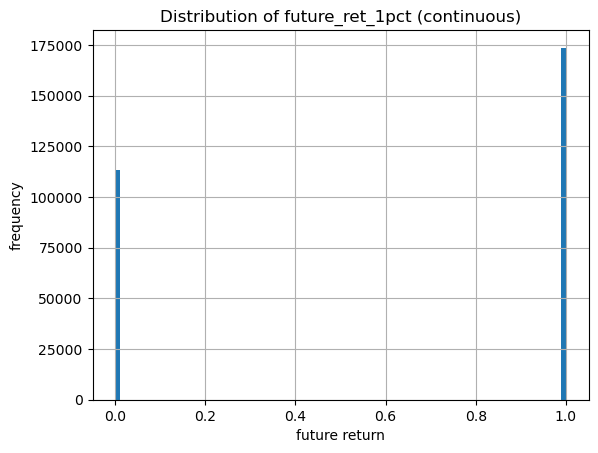

In [445]:
import matplotlib.pyplot as plt

plt.hist(y, bins=100)  # 100个分布区间
plt.title("Distribution of future_ret_1pct (continuous)")
plt.xlabel("future return")
plt.ylabel("frequency")
plt.grid(True)
plt.show()


<Axes: xlabel='future_ret_1pct', ylabel='Density'>

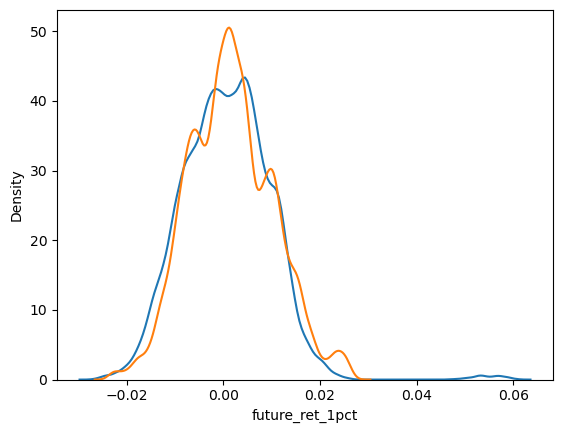

In [446]:
import seaborn as sns
train_len = int(len(df) * 0.8)

sns.kdeplot(df['future_ret_1pct'].iloc[:train_len], label='Train')
sns.kdeplot(df['future_ret_1pct'].iloc[train_len:], label='Val')

In [467]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit # 引入 TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
from collections import Counter


print(xgb.__version__)


test_size_ratio = 0.2
split_point = int(len(X) * (1 - test_size_ratio))

X_train_val = X.iloc[:split_point] # 用于训练和验证的数据 (历史数据)
y_train_val = y.iloc[:split_point]

X_test_final = X.iloc[split_point:] # 最终的测试集 (未来数据)
y_test_final = y.iloc[split_point:]

print(f"用于训练/验证集（历史数据）样本数: {len(X_train_val)}")
print(f"最终测试集（未来数据）样本数: {len(X_test_final)}")

tscv = TimeSeriesSplit(n_splits=5)

oof_preds_proba = np.zeros((len(X_train_val), 2))
models = []
fold_eval_results = []


print("\n🚀 开始 TimeSeries K-Fold 交叉验证训练...")
for fold, (train_index, val_index) in enumerate(tscv.split(X_train_val)):
    print(f"\n--- Fold {fold + 1}/{tscv.n_splits} ---")
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    print(f"  训练集时间范围: {X_train_fold.index.min()} to {X_train_fold.index.max()}")
    print(f"  验证集时间范围: {X_val_fold.index.min()} to {X_val_fold.index.max()}")
    
    if X_train_fold.index.max() >= X_val_fold.index.min():
        print("  ⚠️ 警告：训练集和验证集存在时间重叠或乱序！请检查 TimeSeriesSplit 的使用。")

    pos_count = y_train_fold.value_counts().get(1, 0) # 标签为 1 (涨) 的数量
    neg_count = y_train_fold.value_counts().get(0, 0) # 标签为 0 (跌) 的数量

    scale_pos_weight_val = 1.0 # 默认值，如果 neg_count 或 pos_count 为 0 则保持 1.0
    if pos_count > 0 and neg_count > 0:
        scale_pos_weight_val = neg_count / pos_count
        # 也可以尝试手动调整，例如：
        # scale_pos_weight_val = neg_count / pos_count * 1.5 # 尝试更激进一点
        # 或者直接固定一个值进行尝试，如 0.8, 1.0, 1.2 等，但先用计算值

    print(f"  当前折叠计算出的 scale_pos_weight: {scale_pos_weight_val:.2f}")


    model = xgb.XGBClassifier(
        objective='binary:logistic', # 目标函数改为二分类逻辑回归
        eval_metric='auc',
        random_state=42,
        n_estimators=29000, # 增加估计器数量，结合早停
        learning_rate=0.1, # 学习率降低，防止一步到位
        max_depth=5, # 限制树的深度，控制模型复杂度
        subsample=0.5, # 每次训练采样 80% 的数据
        colsample_bytree=0.5, # 每次训练采样 80% 的特征
        gamma=0.1, # 降低分裂的敏感度
        reg_alpha=0.1, # L1 正则化，有助于稀疏性
        reg_lambda=10, # L2 正则化，防止权重过大
        scale_pos_weight=scale_pos_weight_val, # 直接使用 scale_pos_weight 处理不平衡
        early_stopping_rounds=1000,
    )

    eval_set_for_fit = [
        (X_train_fold, y_train_fold), # 默认命名为 'validation_0'
        (X_val_fold, y_val_fold)      # 默认命名为 'validation_1'
    ]
    
    model.fit(
        X_train_fold, y_train_fold,
        eval_set=eval_set_for_fit,
        verbose=False,
    )
    
    models.append(model)
    fold_eval_results.append(model.evals_result())

    # 存储 OOF 预测概率
    oof_preds_proba[val_index] = model.predict_proba(X_val_fold)

print("\n✅ TimeSeries K-Fold 交叉验证训练完成。")

oof_preds_class = np.argmax(oof_preds_proba, axis=1)

print("\n--- 📊 TimeSeries Cross-validation Results (based on OOF predictions) ---")
print("Classification Report (OOF):")
print(classification_report(y_train_val, oof_preds_class, target_names=['跌 (0)', '涨 (1)']))
print("\nConfusion Matrix (OOF):")
print(confusion_matrix(y_train_val, oof_preds_class))

final_model_for_prediction = models[-1] # 使用最后一个折叠训练出的模型

y_pred_proba_final = final_model_for_prediction.predict_proba(X_test_final) # 输出 (样本数, 2) 的概率
y_pred_class_final = np.argmax(y_pred_proba_final, axis=1) # 预测的类别，0 或 1

print("\n--- 🚀 Final Test Set Evaluation Results ---")
print("\n📊 Classification Report (Test Set):")
# 直接使用 y_test_final 和 y_pred_class_final
print(classification_report(y_test_final, y_pred_class_final, target_names=['跌 (0)', '涨 (1)']))
print("\n📉 Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_final, y_pred_class_final))

df_score = pd.DataFrame(y_pred_proba_final, index=X_test_final.index, columns=["prob_down", "prob_up"])

df_score["true_label"] = y_test_final.values
df_score["predicted_class"] = y_pred_class_final

df_score["score"] = df_score["prob_up"] - df_score["prob_down"]

sig_threshold = 0.65
df_score["signal"] = 0 # 默认信号为 0 (观望/平仓)

df_score.loc[df_score["prob_up"] >= sig_threshold, "signal"] = 1

df_score.loc[df_score["prob_down"] >= sig_threshold, "signal"] = -1

print("\n📌 Final Test Set Prediction Example:")
print(df_score.head(10))
print("\n测试集信号分布：")
print(df_score["signal"].value_counts())

3.0.1
用于训练/验证集（历史数据）样本数: 229601
最终测试集（未来数据）样本数: 57401

🚀 开始 TimeSeries K-Fold 交叉验证训练...

--- Fold 1/5 ---
  训练集时间范围: 0 to 38270
  验证集时间范围: 38271 to 76536
  当前折叠计算出的 scale_pos_weight: 2.38

--- Fold 2/5 ---
  训练集时间范围: 0 to 76536
  验证集时间范围: 76537 to 114802
  当前折叠计算出的 scale_pos_weight: 1.45

--- Fold 3/5 ---
  训练集时间范围: 0 to 114802
  验证集时间范围: 114803 to 153068
  当前折叠计算出的 scale_pos_weight: 1.15

--- Fold 4/5 ---
  训练集时间范围: 0 to 153068
  验证集时间范围: 153069 to 191334
  当前折叠计算出的 scale_pos_weight: 0.96

--- Fold 5/5 ---
  训练集时间范围: 0 to 191334
  验证集时间范围: 191335 to 229600
  当前折叠计算出的 scale_pos_weight: 0.74

✅ TimeSeries K-Fold 交叉验证训练完成。

--- 📊 TimeSeries Cross-validation Results (based on OOF predictions) ---
Classification Report (OOF):
              precision    recall  f1-score   support

       跌 (0)       0.49      0.70      0.57     97644
       涨 (1)       0.67      0.46      0.55    131957

    accuracy                           0.56    229601
   macro avg       0.58      0.58      0.56    229

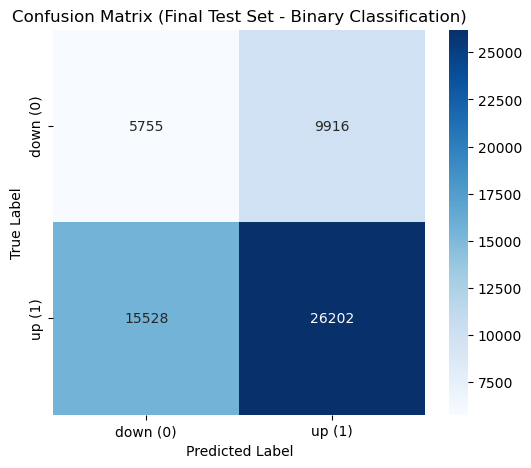

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_final, y_pred_class_final, labels=[0, 1])

# 为了图表更清晰，我们可以定义更具描述性的标签
# 这里的顺序要和上面 `labels` 参数的顺序一致
display_labels = ['down (0)', 'up (1)']

plt.figure(figsize=(6, 5)) # 可以调整图表大小
sns.heatmap(cm,
            annot=True,    # 显示数字
            fmt='d',       # 以整数格式显示数字
            cmap='Blues',  # 颜色映射
            xticklabels=display_labels, # x轴标签 (预测值)
            yticklabels=display_labels) # y轴标签 (真实值)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Final Test Set - Binary Classification)')
plt.show()


📉 Final Train Loss: 0.9998
📉 Final Test Loss: 0.5882


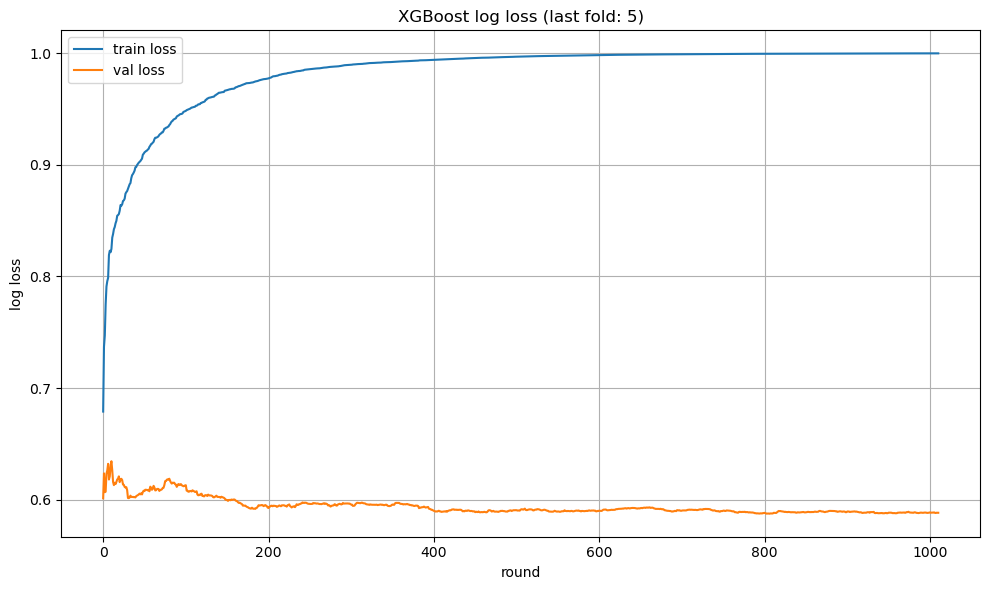

In [469]:
# ---
### 5. 可视化最后一个交叉验证折叠的训练和验证损失

if fold_eval_results: # 确保有结果可以绘制
    last_fold_results = fold_eval_results[-1]
    train_loss = last_fold_results['validation_0']['auc'][-1]
    test_loss = last_fold_results['validation_1']['auc'][-1]
    
    print(f"📉 Final Train Loss: {train_loss:.4f}")
    print(f"📉 Final Test Loss: {test_loss:.4f}")
    plt.figure(figsize=(10, 6))

    # --- 关键修正：使用默认的键名 'validation_0' (训练集) 和 'validation_1' (验证集) ---
    # 因为 fit 方法中的 eval_set 没有显式命名，XGBoost 会自动分配这些默认名称。
    train_logloss = last_fold_results['validation_0']['auc']
    val_logloss = last_fold_results['validation_1']['auc']
    # --- 结束关键修正部分 ---

    epochs = len(train_logloss)
    x_axis = range(epochs)

    plt.plot(x_axis, train_logloss, label='train loss')
    plt.plot(x_axis, val_logloss, label='val loss')

    plt.legend()
    plt.title(f"XGBoost log loss (last fold: {tscv.n_splits})")
    plt.xlabel("round")
    plt.ylabel("log loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ 没有评估结果可以绘制，请检查训练过程。")

In [485]:
import pandas as pd
import numpy as np

final_model_for_prediction = models[-1] # 使用最后一个折叠训练出的模型


feature_columns = [col for col in df.columns if col.endswith('_scaled')]
back_test_x = df[feature_columns]

y_proba_all = final_model_for_prediction.predict_proba(back_test_x)

df_score_back_test = pd.DataFrame(y_proba_all, index=back_test_x.index, columns=["prob_down", "prob_up"])

df_score_back_test["score"] = df_score_back_test["prob_up"] - df_score_back_test["prob_down"]

sig_threshold = 0.25
df_score_back_test["signal_score"] = df_score_back_test["prob_up"] - df_score_back_test["prob_down"]

# 离散化
df_score_back_test["signal"] = 0
df_score_back_test.loc[df_score_back_test["signal_score"] >= sig_threshold, "signal"] = 1
df_score_back_test.loc[df_score_back_test["signal_score"] <= -sig_threshold, "signal"] = -1



print("\n📌 df_signal 示例:")
print(df_score_back_test.head(1000))



📌 df_signal 示例:
     prob_down   prob_up     score  signal_score  signal
0     0.582515  0.417485 -0.165030     -0.165030       0
1     0.568568  0.431432 -0.137136     -0.137136       0
2     0.568568  0.431432 -0.137136     -0.137136       0
3     0.582515  0.417485 -0.165030     -0.165030       0
4     0.582515  0.417485 -0.165030     -0.165030       0
..         ...       ...       ...           ...     ...
995   0.701147  0.298853 -0.402294     -0.402294      -1
996   0.701147  0.298853 -0.402294     -0.402294      -1
997   0.701147  0.298853 -0.402294     -0.402294      -1
998   0.701147  0.298853 -0.402294     -0.402294      -1
999   0.701147  0.298853 -0.402294     -0.402294      -1

[1000 rows x 5 columns]


In [487]:
df_backtest = df.copy()

df_backtest['signal'] = df_score_back_test['signal']
print(df.columns.tolist())
df_backtest.index = pd.to_datetime(df_backtest['ts'], unit='us', utc=True)  # 先转成 UTC 时间戳
df_backtest.index = df_backtest.index.tz_convert('Asia/Shanghai')  
df_backtest

['ts', 'price', 'sum_buy_size', 'sum_sell_size', 'timestamp_duration', 'price_pct_change', 'buy_sell_imbalance', 'change_side', 'alt_factor_long_term_oi_trend', 'alt_top_long_short_position_ratio_data_longShortRatio_scaled', 'alt_trade_taker_long_short_ratio_data_buySellRatio_scaled', 'alt_factor_short_term_oi_trend_scaled', 'alt_factor_long_term_oi_trend_scaled', 'alt_factor_buy_sell_vol_diff_scaled', 'impact_price_pct_ask_imn', 'impact_price_pct_bid_imn', 'ts_rolling_mean', 'sum_buy_size_rolling_mean', 'sum_sell_size_rolling_mean', 'timestamp_duration_rolling_mean', 'price_pct_change_rolling_mean', 'buy_sell_imbalance_rolling_mean', 'change_side_rolling_mean', 'alt_factor_long_term_oi_trend_rolling_mean', 'impact_price_pct_ask_imn_rolling_mean', 'impact_price_pct_bid_imn_rolling_mean', 'ts_rolling_std', 'sum_buy_size_rolling_std', 'sum_sell_size_rolling_std', 'timestamp_duration_rolling_std', 'price_pct_change_rolling_std', 'buy_sell_imbalance_rolling_std', 'change_side_rolling_std',

,ts,price,sum_buy_size,sum_sell_size,timestamp_duration,price_pct_change,buy_sell_imbalance,change_side,alt_factor_long_term_oi_trend,alt_top_long_short_position_ratio_data_longShortRatio_scaled,...,momentum_confirmed_by_orderflow_scaled,oi_long_breakout_signal_scaled,oi_short_breakout_signal_scaled,steps_to_05pct,steps_to_1pct,steps_to_2pct,future_ret_05pct,future_ret_1pct,future_ret_2pct,signal
ts,,,,,,,,,,,,,,,,,,,,,
2025-04-06 17:00:48.064000+08:00,1743930048064000,82965.9,5.255,12.272,22689000.0,-0.000200,-7.017,0.0,70595.031181,0.846217,...,0.218688,0.424959,0.592319,631.0,1833.0,2892.0,-0.001537,-0.004370,-0.036523,0
2025-04-06 17:02:09.586000+08:00,1743930129586000,82982.5,50.553,43.983,81522000.0,0.000200,6.570,1.0,70595.031181,0.846217,...,0.265090,0.925832,0.589711,621.0,1831.0,2888.0,-0.001557,-0.004368,-0.036598,0
2025-04-06 17:04:12.639000+08:00,1743930252639000,82999.1,119.582,34.605,123053000.0,0.000200,84.977,1.0,70595.031181,0.846217,...,0.702840,0.988274,0.589586,607.0,1002.0,2886.0,-0.001557,-0.004437,-0.036791,0
2025-04-06 17:04:19.845000+08:00,1743930259845000,82982.5,12.350,24.080,7206000.0,-0.000200,-11.730,0.0,70595.031181,0.846217,...,0.215332,0.548091,0.587480,619.0,1829.0,2886.0,-0.001557,-0.004167,-0.036523,0
2025-04-06 17:05:04.381000+08:00,1743930304381000,82965.9,25.966,51.393,44536000.0,-0.000200,-25.427,0.0,70601.935583,0.779814,...,0.215332,0.731732,0.585338,627.0,1829.0,2888.0,-0.001157,-0.003768,-0.036138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19 06:20:04.044000+08:00,1747606804044000,104230.2,3.594,0.020,879000.0,0.000202,3.574,1.0,83194.249556,0.196591,...,0.913334,0.331850,0.523104,54.0,166.0,1811.0,NaN,NaN,NaN,0
2025-05-19 06:20:14.263000+08:00,1747606814263000,104209.0,16.225,21.624,10219000.0,-0.000203,-5.399,0.0,83194.249556,0.196591,...,0.202778,0.734210,0.522952,51.0,163.0,1798.0,NaN,NaN,NaN,0
2025-05-19 06:20:18.920000+08:00,1747606818920000,104230.0,7.640,10.796,4657000.0,0.000202,-3.156,1.0,83194.249556,0.196591,...,0.118912,0.507899,0.521183,52.0,164.0,1805.0,NaN,NaN,NaN,0


In [488]:
import pandas as pd
import numpy as np

# 假设 df 是原始带 price 的 DataFrame，df_signal 是模型信号（已经时间对齐）

# === 添加 price 和 future_return 到 df_signal ===
df_backtest["price"] = df_backtest["price"].values  # 添加 price
df_backtest["future_return"] = np.log(df_backtest["price"].shift(-1) / df_backtest["price"])  # 加 log return

# === 开始手动回测（基于真实价格） ===
initial_fund = 1.0
fund = initial_fund
position = 0  # 当前是否持仓（+1 多头，-1 空头，0 空仓）
entry_price = None
entry_signal = 0

records = []
trade_stats = []

entry_time = None
for i in range(len(df_backtest)):
    sig = df_backtest['signal'].iloc[i]
    price = df_backtest['price'].iloc[i]
    timestamp = df_backtest.index[i]

    # 开仓：空仓 -> 有仓（非0信号）
    if position == 0 and sig != 0:
        entry_time = timestamp
        entry_price = price
        entry_signal = sig
        position = sig  # +1 or -1
        # 手续费成本（开仓时暂不扣除）
    
    # 平仓：已有仓 -> 空仓（反向信号）
    elif position != 0 and sig == -entry_signal:
        pnl = (price - entry_price) / entry_price * entry_signal
        pnl_net = pnl - 0.002  # 手续费
        fund *= (1 + pnl_net)

        trade_stats.append({
            "entry_time": entry_time,
            "exit_time": timestamp,
            "direction": entry_signal,
            "pnl_pct": pnl_net,
            "entry_price": entry_price,
            "exit_price": price,

        })
        position = 0
        entry_price = None
        entry_signal = 0

    # 若仍持仓，计算浮动盈亏（不加手续费）
    if position != 0:
        unrealized_pnl = (price - entry_price) / entry_price * position
        fund_tmp = fund * (1 + unrealized_pnl)
    else:
        fund_tmp = fund

    records.append({
        "timestamp": timestamp,
        "price": price,
        "signal": sig,
        "position": position,
        "fund": fund_tmp,
        "price_bench": price / df_backtest["price"].iloc[0]  # 归一化价格
    })

df_curve = pd.DataFrame(records).set_index("timestamp")
df_trades = pd.DataFrame(trade_stats)

In [489]:
if not df_trades.empty:
    total_trades = len(df_trades)
    win_trades = df_trades[df_trades['pnl_pct'] > 0]
    lose_trades = df_trades[df_trades['pnl_pct'] <= 0]

    win_rate = len(win_trades) / total_trades
    avg_win = win_trades['pnl_pct'].mean()
    avg_loss = lose_trades['pnl_pct'].mean()
    max_win = win_trades['pnl_pct'].max()
    max_loss = lose_trades['pnl_pct'].min()
    total_return = df_curve['fund'].iloc[-1] - 1

    # 回撤计算
    peak = df_curve['fund'].cummax()
    drawdown = df_curve['fund'] / peak - 1
    max_drawdown = drawdown.min()

    print("📈 Strategy Performance:")
    print(f"➡️  Total Trades     : {total_trades}")
    print(f"✅  Win Rate         : {win_rate:.2%}")
    print(f"📈  Avg Win          : {avg_win:.2%}")
    print(f"📉  Avg Loss         : {avg_loss:.2%}")
    print(f"🏆  Max Win          : {max_win:.2%}")
    print(f"💣  Max Loss         : {max_loss:.2%}")
    print(f"💰  Final Fund       : {df_curve['fund'].iloc[-1]:.4f}")
    print(f"📊  Total Return     : {total_return:.2%}")
    print(f"📉  Max Drawdown     : {max_drawdown:.2%}")
else:
    print("⚠️ No trades were executed.")

📈 Strategy Performance:
➡️  Total Trades     : 141
✅  Win Rate         : 49.65%
📈  Avg Win          : 1.17%
📉  Avg Loss         : -0.59%
🏆  Max Win          : 7.32%
💣  Max Loss         : -3.18%
💰  Final Fund       : 1.4840
📊  Total Return     : 48.40%
📉  Max Drawdown     : -7.44%


2025-04-06 17:30:15.561000+08:00 2025-04-06 21:00:03.709000+08:00
-1 0.0028201531518191048
83067.9 82667.5
2025-04-06 21:00:13.198000+08:00 2025-04-06 21:45:04.693000+08:00
1 -0.0050082554658441095
82672.5 82423.8
2025-04-06 21:45:10.362000+08:00 2025-04-07 06:35:04.086000+08:00
-1 0.04165451446801019
82440.5 78841.6
2025-04-07 06:35:04.724000+08:00 2025-04-07 09:20:35.516000+08:00
1 0.00037866584121676056
78825.7 79013.2
2025-04-07 09:21:04.386000+08:00 2025-04-07 14:55:00.135000+08:00
-1 0.05422052818548445
79101.0 74653.9
2025-04-07 14:55:00.217000+08:00 2025-04-08 12:45:01.424000+08:00
1 0.07324132987667215
74638.5 80254.4
2025-04-08 12:45:05.248000+08:00 2025-04-08 14:55:15.687000+08:00
-1 0.008225789928251221
80238.3 79417.8
2025-04-08 14:55:15.793000+08:00 2025-04-08 17:55:05.111000+08:00
1 -0.00741780167218896
79404.9 78974.7
2025-04-08 17:55:05.473000+08:00 2025-04-09 16:40:00.413000+08:00
-1 0.021921076024221074
78972.2 77083.1
2025-04-09 16:40:03.319000+08:00 2025-04-10 03:3

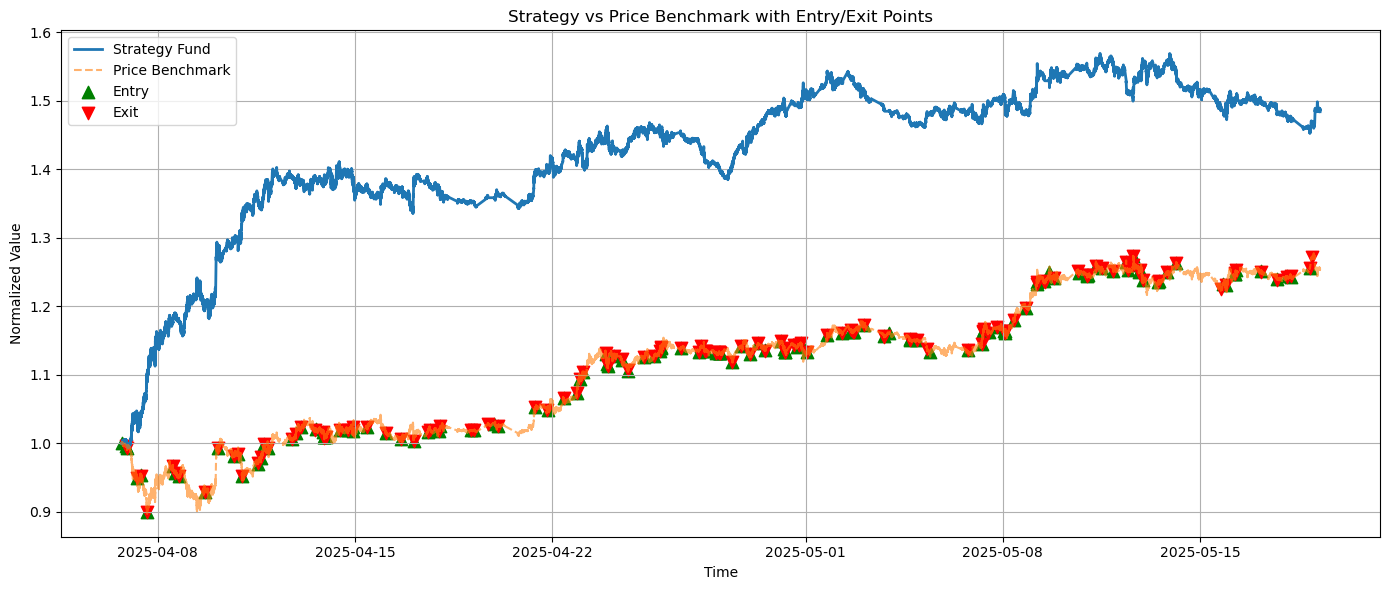

In [491]:
# 提取开仓和平仓点用于标注
entry_points = []
exit_points = []

for trade in trade_stats:
    entry_time = trade['entry_time']
    exit_time = trade['exit_time']
    print(entry_time, exit_time)
    print(trade['direction'], trade['pnl_pct']) 
    print(trade['entry_price'], trade['exit_price']) 
    print('======================')
    # 这里获取的是 price_bench 的值，不是 fund
    if entry_time in df_curve.index:
        entry_price_data = df_curve.loc[entry_time, 'price_bench']
        if isinstance(entry_price_data, pd.Series) or isinstance(entry_price_data, pd.DataFrame):
            entry_price = entry_price_data.iloc[0]
        else:
            entry_price = entry_price_data
    else:
        entry_price = None

    if exit_time in df_curve.index:
        exit_price_data = df_curve.loc[exit_time, 'price_bench']
        if isinstance(exit_price_data, pd.Series) or isinstance(exit_price_data, pd.DataFrame):
            exit_price = exit_price_data.iloc[0]
        else:
            exit_price = exit_price_data
    else:
        exit_price = None

    if entry_price is not None:
        entry_points.append((entry_time, entry_price))
    if exit_price is not None:
        exit_points.append((exit_time, exit_price))

# 可视化
plt.figure(figsize=(14, 6))
plt.plot(df_curve["fund"], label="Strategy Fund", linewidth=2)
plt.plot(df_curve["price_bench"], label="Price Benchmark", linestyle="--", alpha=0.6)

# 标注开仓点（绿色向上三角），画在 price_bench 上
if entry_points:
    entry_times, entry_prices = zip(*entry_points)
    plt.scatter(entry_times, entry_prices, marker="^", color="green", label="Entry", s=80)

# 标注平仓点（红色向下三角），画在 price_bench 上
if exit_points:
    exit_times, exit_prices = zip(*exit_points)
    plt.scatter(exit_times, exit_prices, marker="v", color="red", label="Exit", s=80)

plt.title("Strategy vs Price Benchmark with Entry/Exit Points")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


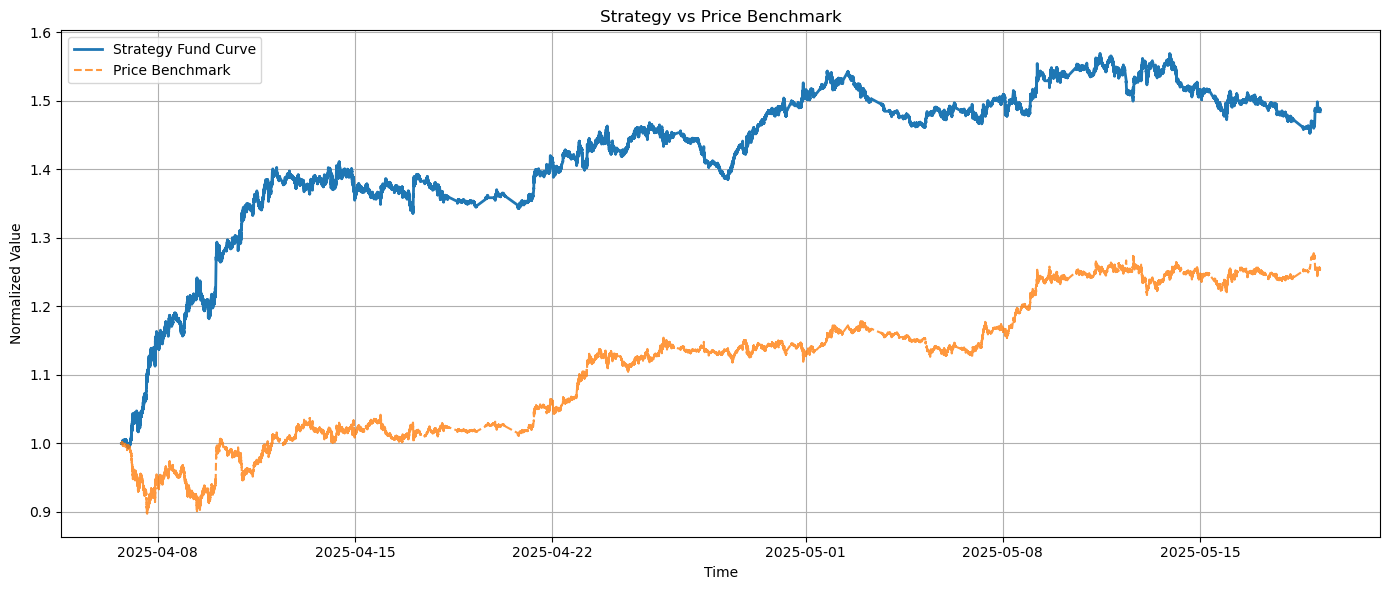

In [492]:
plt.figure(figsize=(14, 6))
plt.plot(df_curve["fund"], label="Strategy Fund Curve", linewidth=2)
plt.plot(df_curve["price_bench"], label="Price Benchmark", linestyle="--", alpha=0.8)
plt.title("Strategy vs Price Benchmark")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

整体平均每日收益率: 0.0000

当信号为 '做多' (1) 时的平均每日收益率: 0.0000
当信号为 '做空' (-1) 时的平均每日收益率 (反向收益): 0.0000
当信号为 '观望' (0) 时的平均每日收益率: 0.0000

信号分布:
signal
 0    0.889044
 1    0.069116
-1    0.041840
Name: proportion, dtype: float64


<Figure size 800x600 with 0 Axes>

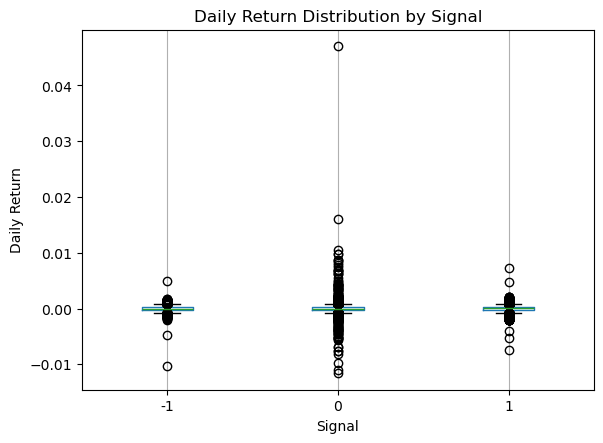

ts
2025-04-06 17:00:48.064000+08:00    0
2025-04-06 17:02:09.586000+08:00    0
2025-04-06 17:04:12.639000+08:00    0
2025-04-06 17:04:19.845000+08:00    0
2025-04-06 17:05:04.381000+08:00    0
                                   ..
2025-05-19 06:20:04.044000+08:00    0
2025-05-19 06:20:14.263000+08:00    0
2025-05-19 06:20:18.920000+08:00    0
2025-05-19 06:20:26.471000+08:00    0
2025-05-19 06:20:50.586000+08:00    0
Name: signal, Length: 378393, dtype: int64
ts
2025-04-06 17:00:48.064000+08:00    0.0
2025-04-06 17:02:09.586000+08:00    0.0
2025-04-06 17:04:12.639000+08:00    0.0
2025-04-06 17:04:19.845000+08:00   -0.0
2025-04-06 17:05:04.381000+08:00   -0.0
                                   ... 
2025-05-19 06:20:04.044000+08:00    0.0
2025-05-19 06:20:14.263000+08:00   -0.0
2025-05-19 06:20:18.920000+08:00    0.0
2025-05-19 06:20:26.471000+08:00    0.0
2025-05-19 06:20:50.586000+08:00    0.0
Name: strategy_return, Length: 378393, dtype: float64
ts
2025-04-06 17:00:48.064000+08:00    

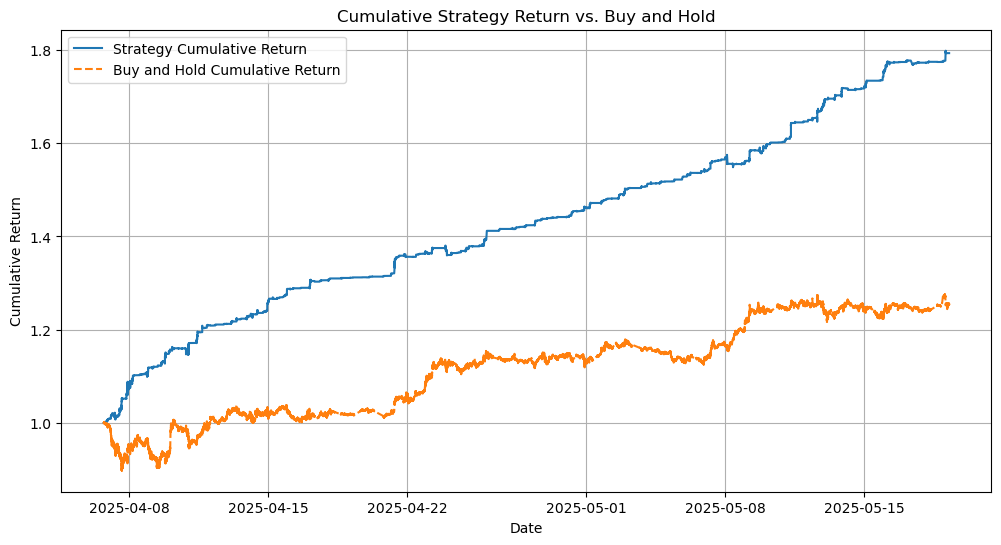

In [509]:

df_backtest['daily_return'] = df_backtest['price'].pct_change()

df_backtest['daily_return'] = df_backtest['daily_return'].fillna(0)
# 1. 整体平均收益率
print(f"整体平均每日收益率: {df_backtest['daily_return'].mean():.4f}")

# 2. 根据信号分组计算平均收益率
# 信号为 1 (做多) 时的平均收益率
mean_return_long = df_backtest[df_backtest['signal'] == 1]['daily_return'].mean()
print(f"\n当信号为 '做多' (1) 时的平均每日收益率: {mean_return_long:.4f}")

# 信号为 -1 (做空) 时的平均收益率
mean_return_short = df_backtest[df_backtest['signal'] == -1]['daily_return'].mean()
# 做空策略的收益与价格下跌同向，所以这里我们看的是 -daily_return
print(f"当信号为 '做空' (-1) 时的平均每日收益率 (反向收益): {-mean_return_short:.4f}")

# 信号为 0 (观望) 时的平均收益率
mean_return_neutral = df_backtest[df_backtest['signal'] == 0]['daily_return'].mean()
print(f"当信号为 '观望' (0) 时的平均每日收益率: {mean_return_neutral:.4f}")

# 3. 计算各个信号出现的频率
print("\n信号分布:")
print(df_backtest['signal'].value_counts(normalize=True))

# 4. 可视化对比 (可选，但推荐)
import matplotlib.pyplot as plt

# 绘制箱线图，对比不同信号下的收益率分布
plt.figure(figsize=(8, 6))
df_backtest.boxplot(column='daily_return', by='signal')
plt.title('Daily Return Distribution by Signal')
plt.xlabel('Signal')
plt.ylabel('Daily Return')
plt.suptitle('') # 移除默认的标题
plt.grid(axis='y')
plt.show()

# 绘制累计收益曲线 (非常简化的版本)
# 假设从 1 元开始，每天的资金变化
# 这是一个非常简化的模拟，不考虑交易成本、仓位管理等
df_backtest['strategy_return'] = df_backtest['daily_return'] * df_backtest['signal']
df_backtest['cumulative_strategy_return'] = (1 + df_backtest['strategy_return']).cumprod()
print(df_backtest['signal'])
print(df_backtest['strategy_return'])
print(df_backtest['cumulative_strategy_return'])

plt.figure(figsize=(12, 6))
plt.plot(df_backtest.index, df_backtest['cumulative_strategy_return'], label='Strategy Cumulative Return')
# 可以加上基准收益（例如一直持有资产的收益）进行对比
df_backtest['cumulative_buy_and_hold_return'] = (1 + df_backtest['daily_return']).cumprod()
plt.plot(df_backtest.index, df_backtest['cumulative_buy_and_hold_return'], label='Buy and Hold Cumulative Return', linestyle='--')

plt.title('Cumulative Strategy Return vs. Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()